In [6]:
import cdsapi

# Connect to the CDS API
c = cdsapi.Client()

# Define the region of interest (in this example, North America)
north_america = [
            55, -141, 25,
            -100,
        ],

# Define the year of interest
year = '2023'

# Define the request parameters
request = {
    'product_type': 'reanalysis',
    'format': 'netcdf',
    'variable': '2m_temperature',
    'year': year,
    'area': north_america,
    'time': '00:00',
}

# Send the request and download the data
c.retrieve('reanalysis-era5-single-levels', request, 'era5.nc')


2023-04-07 19:07:51,872 INFO Welcome to the CDS
2023-04-07 19:07:51,873 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-04-07 19:07:52,066 INFO Request is queued
2023-04-07 19:07:53,257 INFO Request is failed
2023-04-07 19:07:53,258 ERROR Message: the request you have submitted is not valid
2023-04-07 19:07:53,258 ERROR Reason:  
request['area'][0]: [55, -141, 25, -100] is not of type 'string'
2023-04-07 19:07:53,258 ERROR   Traceback (most recent call last):
2023-04-07 19:07:53,259 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 59, in handle_request
2023-04-07 19:07:53,259 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2023-04-07 19:07:53,260 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2023-04-07 19:07:53,260 ERROR       result = proc(context, *context.args, **context.kwargs)
2023-04-07 19:07:53

Exception: the request you have submitted is not valid. 
request['area'][0]: [55, -141, 25, -100] is not of type 'string'.

In [4]:
import xarray as xr 
homedir = '/Users/cowherd/Documents/wy2023/'
t2m = xr.open_dataset(homedir + '../../Downloads/data.nc')

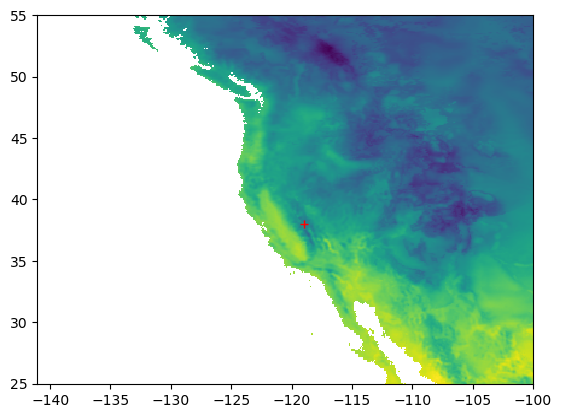

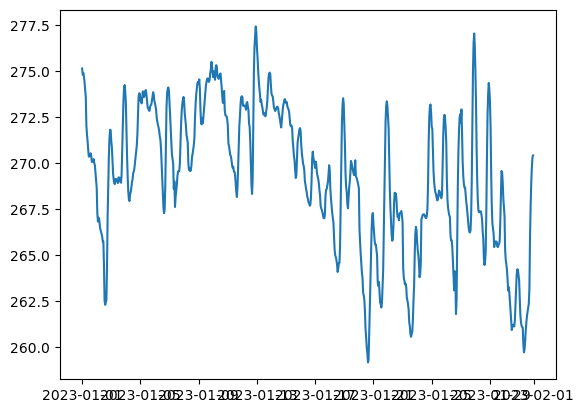

In [34]:
import matplotlib.pyplot as plt 
x = 220
y = 170
fig,ax=plt.subplots()
ax.pcolormesh(t2m.longitude, t2m.latitude, t2m['t2m'][100,:,:])
ax.plot(t2m.longitude.data[x], t2m.latitude.data[y], 'r+')
plt.show()
fig,ax=plt.subplots()
ax.plot(t2m['time'],t2m['t2m'][:,y,x])
plt.show()

In [24]:
t2m.longitude.data[x], t2m.latitude.data[y]

(-131.0, 25.0)

In [19]:
t2m.longitude.data[100]

-131.0

In [12]:
t2m

<xarray.Dataset>
Dimensions:    (longitude: 411, latitude: 301, time: 744)
Coordinates:
  * longitude  (longitude) float32 -141.0 -140.9 -140.8 ... -100.2 -100.1 -100.0
  * latitude   (latitude) float32 55.0 54.9 54.8 54.7 ... 25.3 25.2 25.1 25.0
  * time       (time) datetime64[ns] 2023-01-01 ... 2023-01-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-04-08 02:10:14 GMT by grib_to_netcdf-2.24.0: /opt/ecmw...

In [36]:
import cdsapi

c = cdsapi.Client()
for year in range(1950,2024):
    c.retrieve(
        'reanalysis-era5-land',
        {
            'variable': '2m_temperature',
            'area': [
                45, -125, 35,
                -115,
            ],
            'time': [
                '00:00',
                '12:00', 
                '15:00',
                '19:00',
                '21:00',
            ],
            'day': [
                '01', '02', '03',
                '04', '05', '06',
                '07', '08', '09',
                '10', '11', '12',
                '13', '14', '15',
                '16', '17', '18',
                '19', '20', '21',
                '22', '23', '24',
                '25', '26', '27',
                '28', '29', '30',
                '31',
            ],
            'month': ['01', '02', '03',
                '04', '05', '06',
                '07', '08', '09',
                '10', '11', '12',],
            'year': [year],
            'format': 'netcdf.zip',
        },
        f'download{year}.netcdf.zip')

2023-04-08 09:26:35,153 INFO Welcome to the CDS
2023-04-08 09:26:35,154 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-04-08 09:26:35,478 INFO Request is queued
2023-04-08 09:26:36,669 INFO Request is running
2023-04-08 09:32:56,734 INFO Request is completed
2023-04-08 09:32:56,736 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data9/adaptor.mars.internal-1680971470.5472922-7593-4-18b0c6c2-2b26-4440-97ee-01ad6fa89a9d.zip to download1950.netcdf.zip (28.3M)
2023-04-08 09:33:00,958 INFO Download rate 6.7M/s   
2023-04-08 09:33:01,345 INFO Welcome to the CDS
2023-04-08 09:33:01,346 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-04-08 09:33:01,550 INFO Request is queued
2023-04-08 09:33:02,745 INFO Request is running
2023-04-08 09:39:22,818 INFO Request is completed
2023-04-08 09:39:22,819 INFO Downloading https://download-0006-clone.copernicus-c

KeyboardInterrupt: 